In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

print("Libraries imported ✅")

Libraries imported ✅


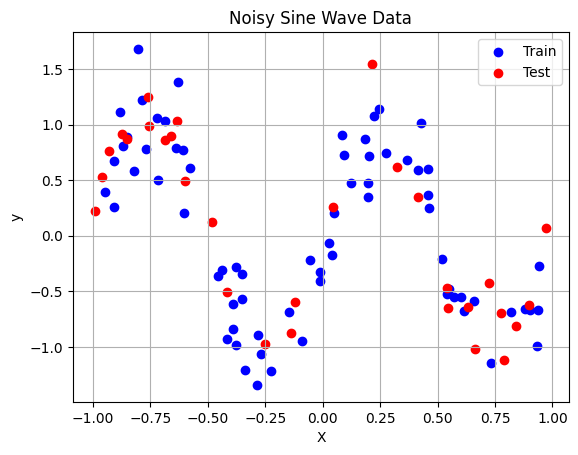

In [3]:
# Generate synthetic data
np.random.seed(42)
n_samples = 100

# True function: y = sin(2πx)
X = np.random.rand(n_samples, 1) * 2 - 1  # X in range [-1, 1]
y_true = np.sin(2 * np.pi * X).ravel()
noise = 0.3 * np.random.randn(n_samples)  # Add noise
y = y_true + noise

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.title("Noisy Sine Wave Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

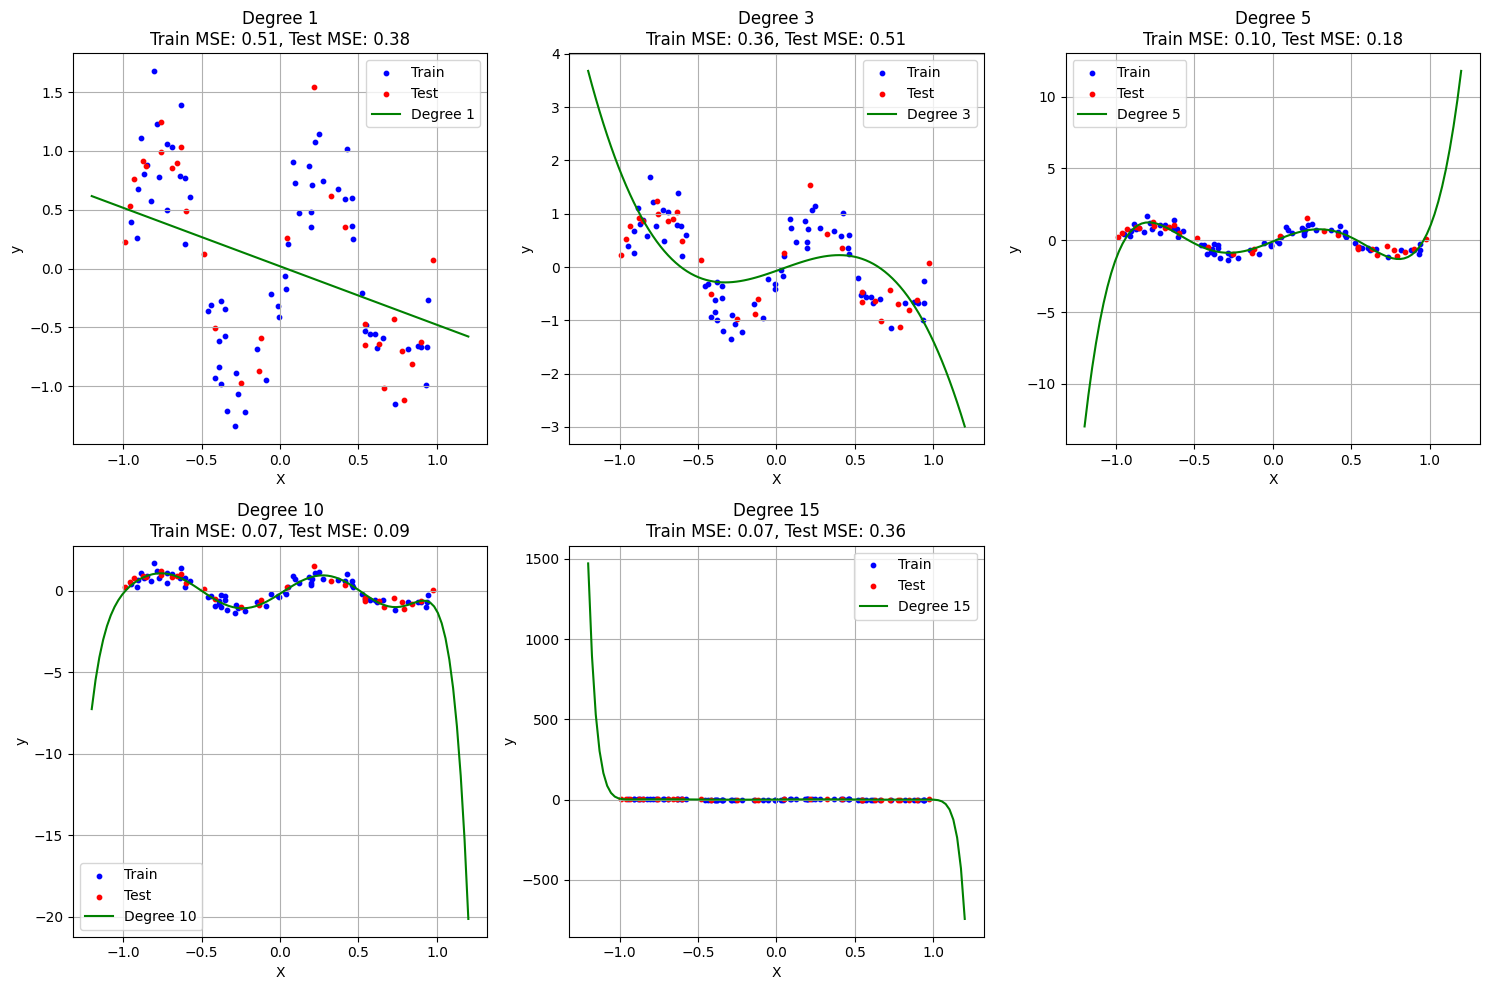

In [4]:
degrees = [1, 3, 5, 10, 15]
x_plot = np.linspace(-1.2, 1.2, 100).reshape(-1, 1)

plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees, 1):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_plot = model.predict(x_plot)

    train_error = mean_squared_error(y_train, y_pred_train)
    test_error = mean_squared_error(y_test, y_pred_test)

    plt.subplot(2, 3, i)
    plt.scatter(X_train, y_train, color='blue', s=10, label='Train')
    plt.scatter(X_test, y_test, color='red', s=10, label='Test')
    plt.plot(x_plot, y_plot, color='green', label=f'Degree {degree}')
    plt.title(f'Degree {degree}\nTrain MSE: {train_error:.2f}, Test MSE: {test_error:.2f}')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

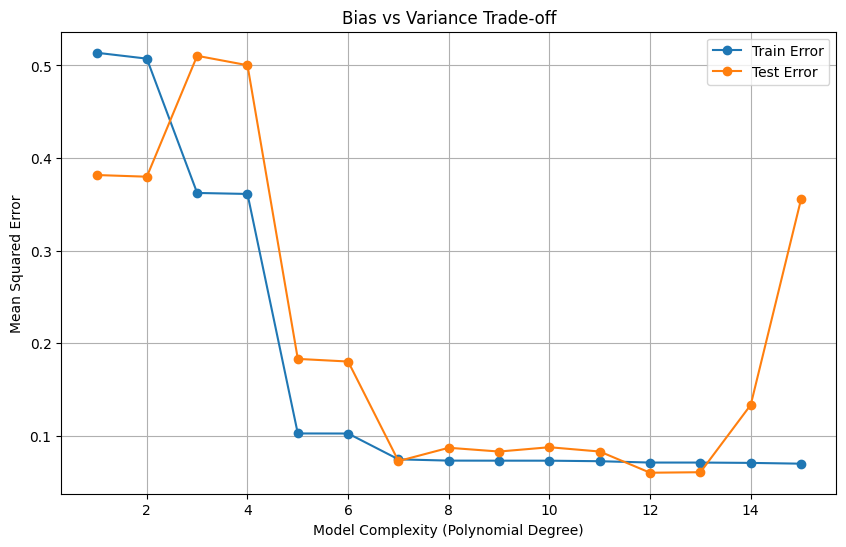

In [5]:
train_errors = []
test_errors = []

all_degrees = range(1, 16)

for degree in all_degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the error curves
plt.figure(figsize=(10, 6))
plt.plot(all_degrees, train_errors, label='Train Error', marker='o')
plt.plot(all_degrees, test_errors, label='Test Error', marker='o')
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Mean Squared Error")
plt.title("Bias vs Variance Trade-off")
plt.legend()
plt.grid(True)
plt.show()